<a href="https://colab.research.google.com/github/pie111/Image-classification-using-keras/blob/main/Copy_of_Untitled5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import os 
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image


In [ ]:
img = image.load_img("/content/drive/MyDrive/DESIGN/basedata/training/grave/image--011.jpg")

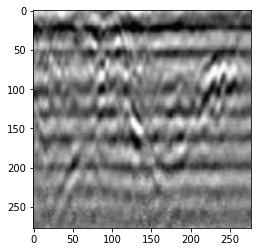

In [ ]:
plt.imshow(img)

In [ ]:
cv2.imread("/content/drive/MyDrive/DESIGN/basedata/training/grave/image--011.jpg")

array([[[235, 235, 235],
        [234, 234, 234],
        [232, 232, 232],
        ...,
        [137, 137, 137],
        [134, 134, 134],
        [132, 132, 132]],

       [[236, 236, 236],
        [235, 235, 235],
        [233, 233, 233],
        ...,
        [133, 133, 133],
        [130, 130, 130],
        [129, 129, 129]],

       [[232, 232, 232],
        [231, 231, 231],
        [229, 229, 229],
        ...,
        [125, 125, 125],
        [122, 122, 122],
        [121, 121, 121]],

       ...,

       [[118, 118, 118],
        [111, 111, 111],
        [103, 103, 103],
        ...,
        [129, 129, 129],
        [131, 131, 131],
        [131, 131, 131]],

       [[119, 119, 119],
        [112, 112, 112],
        [103, 103, 103],
        ...,
        [143, 143, 143],
        [145, 145, 145],
        [146, 146, 146]],

       [[120, 120, 120],
        [112, 112, 112],
        [102, 102, 102],
        ...,
        [151, 151, 151],
        [153, 153, 153],
        [155, 155, 155]]

In [ ]:
train = ImageDataGenerator(rescale=1/255)
validation = ImageDataGenerator(rescale=1/255)

In [ ]:
train_dataset = train.flow_from_directory("/content/drive/MyDrive/DESIGN/basedata/training/",
                                          target_size=(200,200),batch_size =5,class_mode = 'binary')

validation_dataset = train.flow_from_directory("/content/drive/MyDrive/DESIGN/basedata/validation/",
                                          target_size=(200,200),batch_size =5,class_mode = 'binary')

Found 92 images belonging to 2 classes.
Found 92 images belonging to 2 classes.


In [ ]:
train_dataset.class_indices

{'grave': 0, 'non_grave': 1}

In [ ]:
model = tf.keras.models.Sequential([ tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(200,200,3)),
                                    tf.keras.layers.MaxPool2D(2,2),

                                    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
                                    tf.keras.layers.MaxPool2D(2,2),

                                    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                                    tf.keras.layers.MaxPool2D(2,2),

                                    tf.keras.layers.Flatten(),

                                    tf.keras.layers.Dense(512,activation='relu'),

                                    tf.keras.layers.Dense(1,activation='sigmoid')

                                    
])

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer = RMSprop(lr=0.001),
              metrics = ['accuracy'])

In [ ]:
model_fit = model.fit(train_dataset,
                      steps_per_epoch=5,
                      epochs=50,
                      validation_data= validation_dataset)

Epoch 1/50
5/5 [==============================] - 4s 833ms/step - loss: 0.6463 - accuracy: 0.6400 - val_loss: 0.5357 - val_accuracy: 0.7283
Epoch 2/50
5/5 [==============================] - 4s 845ms/step - loss: 0.6615 - accuracy: 0.4800 - val_loss: 0.7816 - val_accuracy: 0.5109
Epoch 3/50
5/5 [==============================] - 4s 831ms/step - loss: 0.5938 - accuracy: 0.6400 - val_loss: 0.5311 - val_accuracy: 0.7609
Epoch 4/50
5/5 [==============================] - 4s 830ms/step - loss: 0.5279 - accuracy: 0.6400 - val_loss: 0.4761 - val_accuracy: 0.6630
Epoch 5/50
5/5 [==============================] - 4s 826ms/step - loss: 0.5426 - accuracy: 0.7200 - val_loss: 0.5059 - val_accuracy: 0.6196
Epoch 6/50
5/5 [==============================] - 4s 828ms/step - loss: 1.4920 - accuracy: 0.4400 - val_loss: 0.5533 - val_accuracy: 0.7391
Epoch 7/50
5/5 [==============================] - 4s 817ms/step - loss: 0.8184 - accuracy: 0.6818 - val_loss: 0.5161 - val_accuracy: 0.7283
Epoch 8/50
5/5 [====

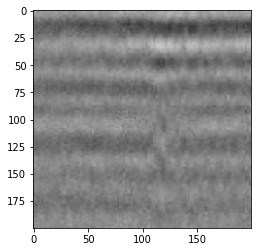

Non grave


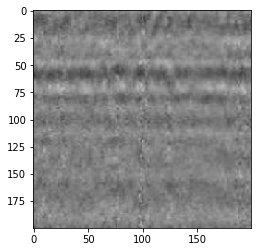

Grave


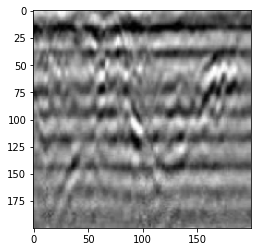

Grave


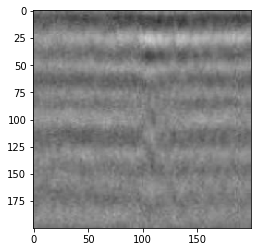

Non grave


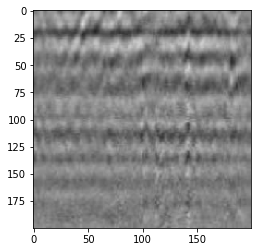

Grave


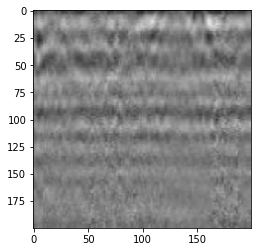

Grave


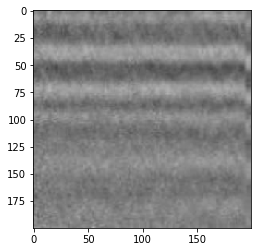

Non grave


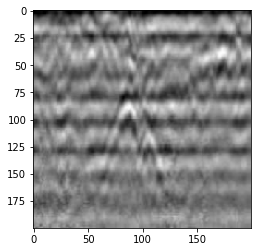

Grave


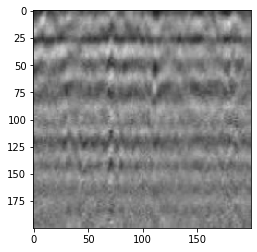

Grave


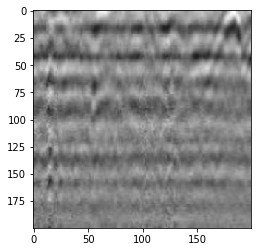

Grave


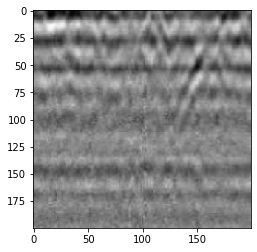

Grave


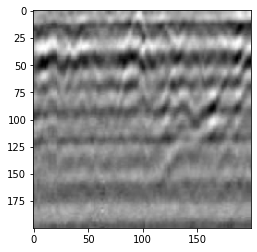

Grave


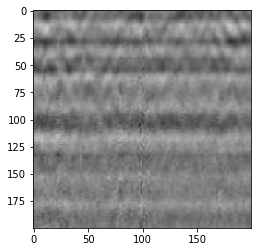

Grave


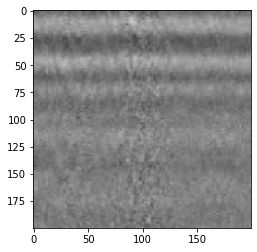

Non grave


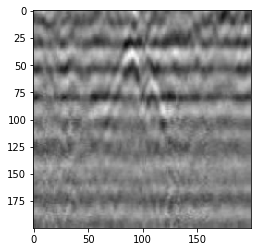

Grave


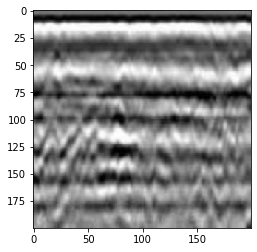

Grave


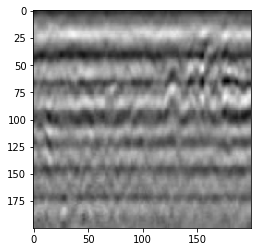

Grave


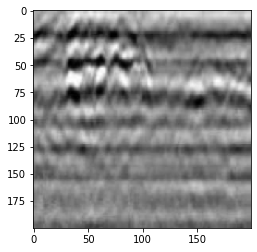

Grave


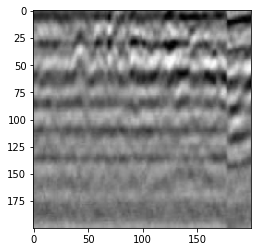

Grave


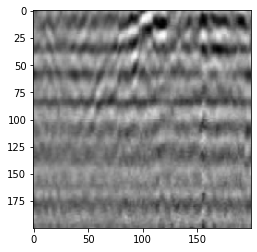

Grave


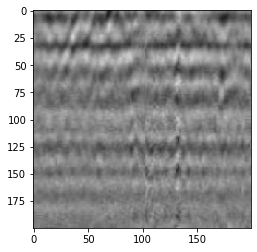

Non grave


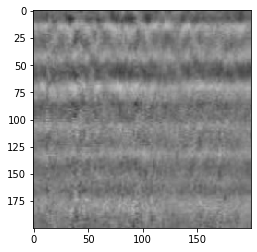

Grave


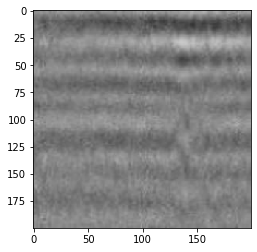

Non grave


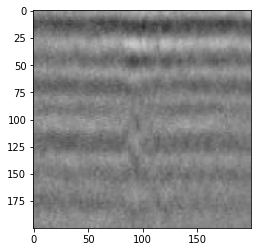

Non grave


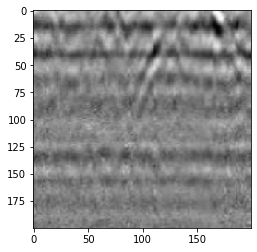

Grave


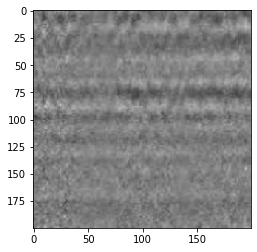

Grave


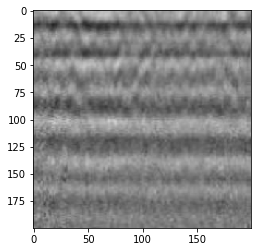

Grave


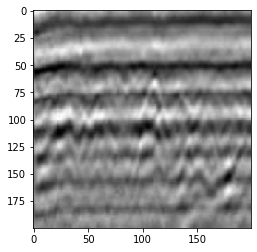

Grave


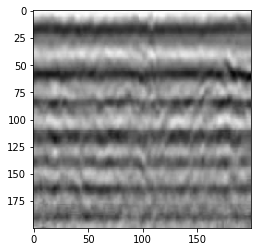

Grave


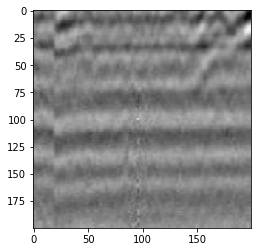

Grave


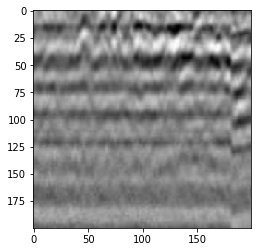

Grave


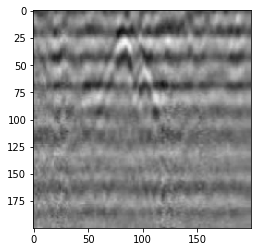

Grave


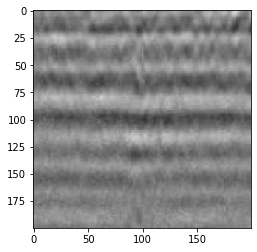

Grave


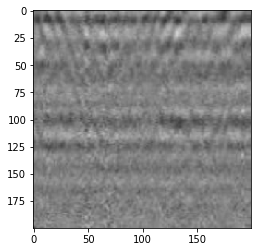

Grave


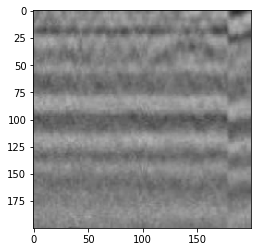

Non grave


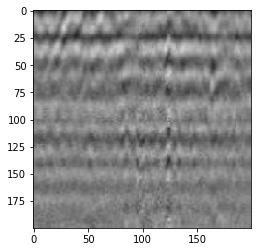

Grave


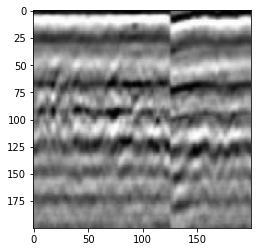

Grave


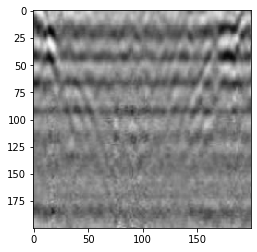

Grave


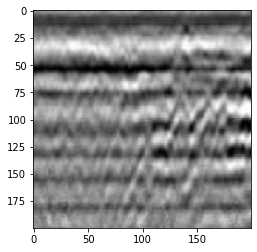

Grave


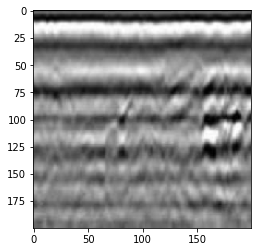

Grave


In [ ]:
dir_path = "/content/drive/MyDrive/DESIGN/basedata/testing/grave/"
for i in os.listdir(dir_path):
  img = image.load_img(dir_path+'//'+i,target_size=(200,200))
  plt.imshow(img)
  plt.show()

  x = image.img_to_array(img)
  x = np.expand_dims(x,axis=0)
  images = np.vstack([x])

  val = model.predict(images)
  if val == 0:
    print("Grave")
  else:
    print("Non grave")


  

In [ ]:
import os
os.chdir("/content/drive/MyDrive/DESIGN/basedata/testing")
!ls

grave  non_grave


In [ ]:
from tensorflow.keras.optimizers import RMSprop

model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(200, 200, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    #tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    #tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    #tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    #tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['accuracy'])

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
